one hot encoding

In [2]:
"""Input
0 → cat
1 → dog
2 → car

eg 1 .input size X for 4 samples = (3 X 4)
eg 2 . mnist input size X for 60000 samples = (784 X 60000)
      output y size = (10 X 60000)

Example:
Suppose the first 5 labels are:

[3, 0, 9, 1, 3]

Then the corresponding one-hot-encoded Y matrix looks like:

            s1  s2  s3  s4  s5  ...  s60000
digit_0      0   1   0   0   0
digit_1      0   0   0   1   0
digit_2      0   0   0   0   0
digit_3      1   0   0   0   1
digit_4      0   0   0   0   0
digit_5      0   0   0   0   0
digit_6      0   0   0   0   0
digit_7      0   0   0   0   0
digit_8      0   0   0   0   0
digit_9      0   0   1   0   0


You can imagine the full matrix with 60000 columns. (10 X 60000)
"""



"""Classes:
0 → cat
1 → dog
2 → car
"""
m = 4 # no of samples
Y = [2, 0, 1, 2]

# for (m = 4)  samples output y one hot encoded
# size : (3 X 4)
one_hot_Y =
[
  (0, [0, 1, 0, 0]),   # class 0
  (1, [0, 0, 1, 0]),   # class 1
  (2, [1, 0, 0, 1])    # class 2
]

# after forward pass we get A2 will look something like this
A2 = [0.1, 0.3, 0.6]

dz2 = A2 - Y
# and the backprop more will take place

SyntaxError: invalid syntax (ipython-input-857399272.py, line 45)

In [6]:
def one_hot_Y(y,num_classes):
  one_hot_Y = np.zeros((num_classes, y.shape[0] ))
  one_hot_Y[y, np.arange(y.shape[0])] = 1
  return one_hot_Y

## Activations

Here is the clean, practical rulebook. No theory dump. No hand-holding. Just *where each activation should actually be used* and *why*.

---

# 1. SOFTMAX

**Where to use:**

* **Output layer of multi-class classification** (MNIST, CIFAR-10, any problem with more than 2 classes).

**Why:**

* Converts raw logits into a probability distribution (sums to 1).
* Works perfectly with **cross entropy loss**.
* Gives the gradient simplification: `dZ = A2 − one_hot_Y`.

**Never use softmax in hidden layers.**

---

# 2. SIGMOID

**Where to use:**

* **Output layer for binary classification only** (two classes: 0 or 1).
  Example: spam/not spam, cancer/not cancer.

**Why:**

* Converts logits to a probability between 0 and 1.
* Used with **binary cross entropy (BCE)**.

**Never use sigmoid in hidden layers.
Why?**

* saturates (0 or 1), kills gradient
* slow learning
* causes vanishing gradients

Only keep sigmoid for the **final layer of binary classification**.

---

# 3. ReLU (Rectified Linear Unit)

**Where to use:**

* **The default activation for all hidden layers** in modern neural networks.
* MLPs, CNNs, transformers, etc.

**Why:**

* Very cheap
* Doesn’t saturate in the positive region
* Allows networks to learn deep features
* Fast convergence -> stable gradients -> no vanishing problem (mostly)

**Rule:**
If someone asks “Which activation for hidden layers?”
=> **ReLU. Always ReLU** unless you have a special reason not to.

---

# 4. TANH

**Where to use:**
Rare today.
But acceptable in these cases:

* If input features are centered around **negative and positive values** (tanh outputs [-1, 1])
* RNNs (older architectures)
* Very small networks where symmetry around zero helps

**Why it's rare:**

* Still has vanishing gradients
* Slower than ReLU
* Mostly replaced by ReLU in modern architectures

**One rule:**
**Don’t use tanh unless you know exactly why you’re using it.**

---

# Simple table you can memorize

| Layer type                 | Recommended activation                    |
| -------------------------- | ----------------------------------------- |
| Input layer                | None                                      |
| Hidden layers (MLPs)       | ReLU                                      |
| Hidden layers (CNNs)       | ReLU                                      |
| Binary classification      | Sigmoid (output only)                     |
| Multi-class classification | Softmax (output only)                     |
| RNNs (old)                 | tanh                                      |
| LSTMs/GRUs                 | Internally use sigmoid/tanh automatically |

---

# What you should use for MNIST (your network)

### Hidden layer

```
ReLU
```

### Output layer

```
Softmax
```

Done.

---

### Implementing a multi-layer perceptron(MLP)  
(1 input layer X 1 hidden layer X 1 output layer )


In [7]:
strcture = """
model = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

implemented and the 1.forward prop
                    2. backward prop
"""

def forward(self, x):
        """
        The forward method takes in one or more training examples and
        returns the predictions. In fact, it returns both the
        activation values from the hidden layer and the output layer,
        `a_h` and `a_out`. While `a_out` represents the
        class-membership probabilities that we can convert to class labels,
        which we care about, we also need the activation values from the
        hidden layer, `a_h`, to optimize the model parameters;
        that is, the weight and bias units of the hidden and output layers.
        """

        # return a_h, a_out
        pass



def backward(self, x, a_h, a_out, y):
        """
        The backward method implements the so-called backpropagation
        algorithm, which calculates the gradients of the loss with
        respect to the weight and bias parameters.
        When training a neural network, you need to compute:

        1. The gradient of the loss with respect to output weights
        2. The gradient of the loss with respect to output biases
        3. The gradient of the loss with respect to hidden weights
        4. The gradient of the loss with respect to hidden biases

        Because you update ALL these parameters during training.
        """


# Coding the neural network training loop

"""
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):

    # Takes in the dataset and divides it into mini-batches of
    # desired size for SGD training.

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size + 1,
                           minibatch_size):
        batch_idx = indices[start_idx: start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]


def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/i
    acc = correct_pred/num_examples
    return mse, acc
"""



# Train our model

def train(model, X_train, y_train, X_valid, y_valid,
          num_epochs, learning_rate=0.1):


        # print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
        #       f'| Train MSE: {train_mse:.2f} '
        #       f'| Train Acc: {train_acc:.2f}% '
        #       f'| Valid Acc: {valid_acc:.2f}%')

    # return epoch_loss, epoch_train_acc, epoch_valid_acc
    pass




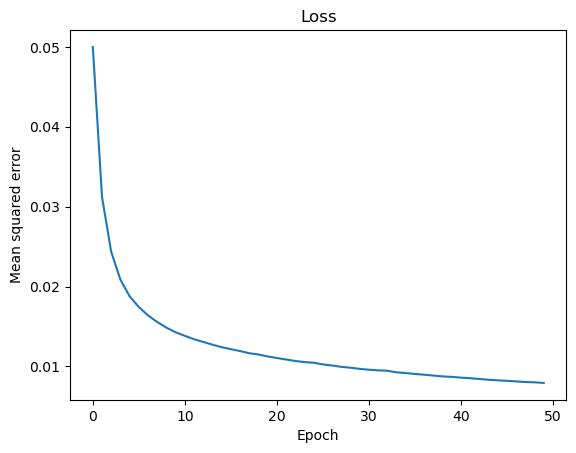


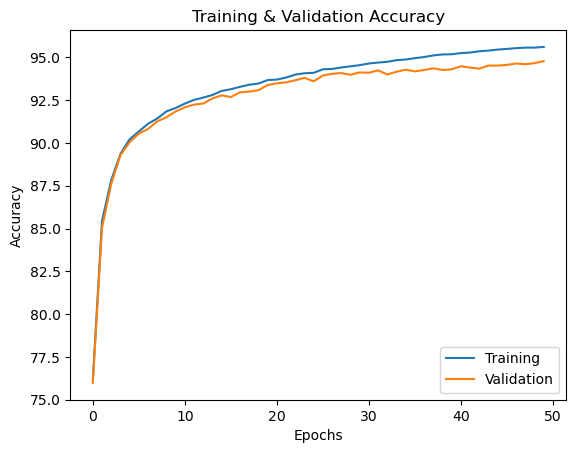

**To further fine-tune the model**, we could change the number of hidden units, the learning rate, or use various other tricks that have been developed over the years but are beyond the scope of this book. In Chapter 14, Classifying Images with Deep Convolutional Neural Networks, you will learn about a different NN architecture that is known for its good performance on image datasets.

Also, the chapter will introduce additional performance-enhancing tricks such as adaptive learning rates, more sophisticated SGD-based optimization algorithms, batch normalization, and dropout.

*Other common tricks that are beyond the scope of the following chapters include:*

  - Adding skip-connections, which are the main contribution of residual NNs

  - Using learning rate schedulers that change the learning rate during training

  - Attaching loss functions to earlier layers in the networks as it’s being done in the popular Inception v3 architecture

In [ ]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5,
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show();


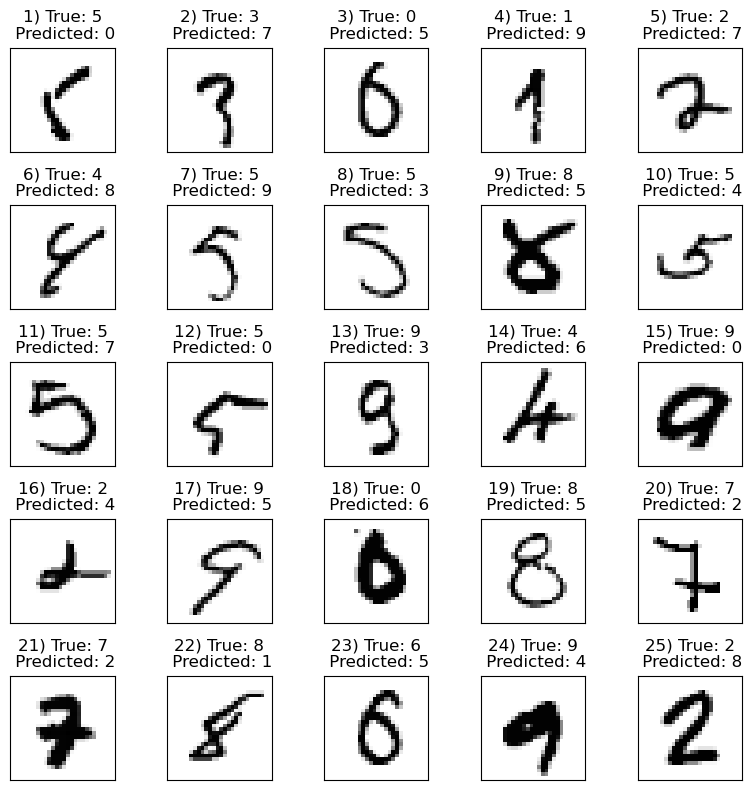